In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [29]:
pd.set_option('display.max_columns', None)

In [30]:
df = pd.read_csv(r"D:\PROJECT\NETFLIX\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv",delimiter=',')

In [31]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (7787, 12)
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009

In [32]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")
df['date_added'] = pd.to_datetime(df['date_added'], errors="ignore")

C:\Users\saran\AppData\Local\Temp\ipykernel_25696\2408986430.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['date_added'] = pd.to_datetime(df['date_added'], errors="ignore")


In [33]:
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [34]:
df['content_age'] = 2025 - df['release_year']
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(',')))

In [35]:
features = df[['content_age', 'genre_count', 'duration_num', 'release_year']]
features = features.fillna(features.median())

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [37]:
X_scaled

array([[-0.69287841,  1.02763369, -1.27823357,  0.69287841],
       [-0.23609223, -0.24457355,  0.46866371,  0.23609223],
       [ 0.3348905 , -0.24457355,  0.17424282, -0.3348905 ],
       ...,
       [-0.57868187,  1.02763369, -0.4931112 ,  0.57868187],
       [-0.57868187, -0.24457355, -1.33711775,  0.57868187],
       [-0.57868187, -0.24457355,  0.40977954,  0.57868187]])

In [ ]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

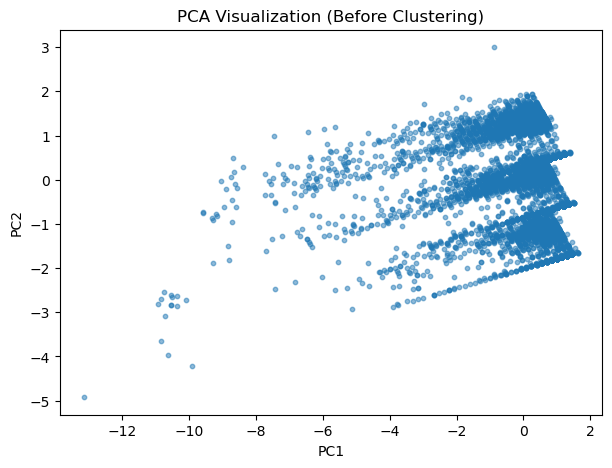

In [39]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, alpha=0.5)
plt.title("PCA Visualization (Before Clustering)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

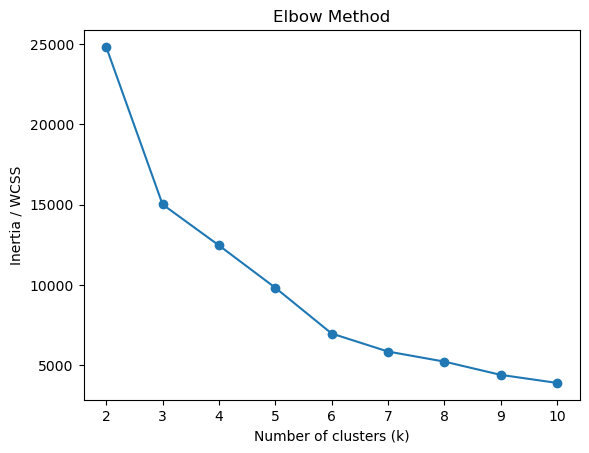

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia / WCSS")
plt.title("Elbow Method")
plt.show()

In [41]:
k = 6 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [42]:

sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

In [43]:
print("\n🔹 KMEANS RESULTS")
print("Silhouette Score:", sil_kmeans)
print("Davies-Bouldin Index:", db_kmeans)




🔹 KMEANS RESULTS
Silhouette Score: 0.43452385849585756
Davies-Bouldin Index: 0.8182024293519344


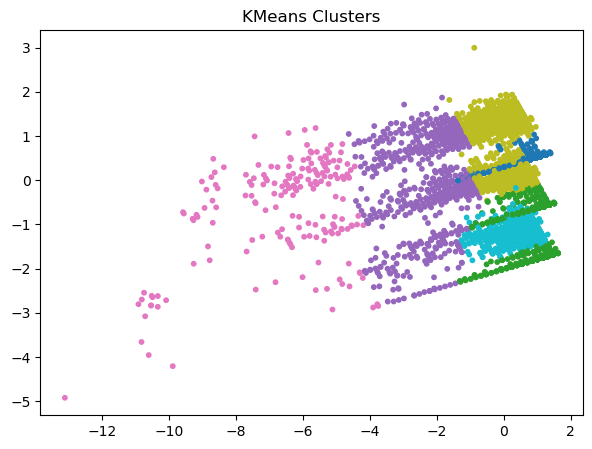

In [44]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='tab10', s=10)
plt.title("KMeans Clusters")
plt.show()

In [45]:
hclust = AgglomerativeClustering(n_clusters=5)
h_labels = hclust.fit_predict(X_scaled)

sil_h = silhouette_score(X_scaled, h_labels)
db_h = davies_bouldin_score(X_scaled, h_labels)

In [46]:
print("\n🔹 HIERARCHICAL CLUSTERING RESULTS")
print("Silhouette Score:", sil_h)
print("Davies-Bouldin Index:", db_h)


🔹 HIERARCHICAL CLUSTERING RESULTS
Silhouette Score: 0.40099649477981564
Davies-Bouldin Index: 0.9055189281917752


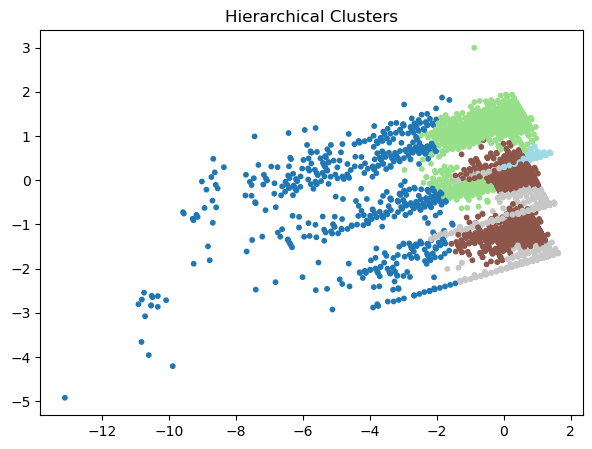

In [47]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=h_labels, cmap='tab20', s=10)
plt.title("Hierarchical Clusters")
plt.show()

In [48]:
dbscan = DBSCAN(eps=1.5, min_samples=8)
db_labels = dbscan.fit_predict(X_scaled)

In [49]:
valid = db_labels != -1
if valid.sum() > 1:
    sil_db = silhouette_score(X_scaled[valid], db_labels[valid])
    db_db = davies_bouldin_score(X_scaled[valid], db_labels[valid])
else:
    sil_db = None
    db_db = None

print("\n🔹 DBSCAN RESULTS")
print("Silhouette Score:", sil_db)
print("Davies-Bouldin Index:", db_db)
print("Noise points:", sum(db_labels == -1))


🔹 DBSCAN RESULTS
Silhouette Score: 0.7807978327421696
Davies-Bouldin Index: 0.20443713415429518
Noise points: 4


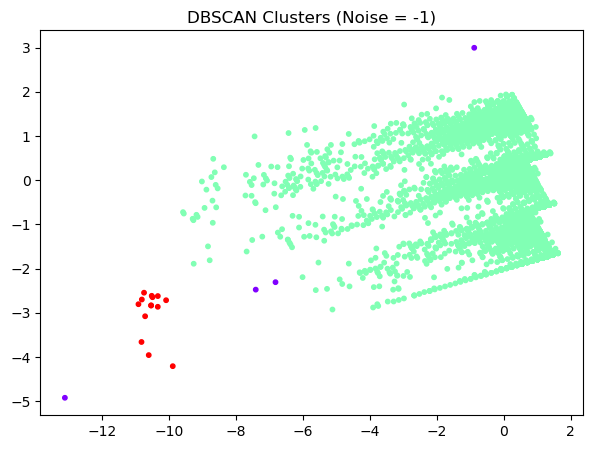

In [50]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='rainbow', s=10)
plt.title("DBSCAN Clusters (Noise = -1)")
plt.show()

In [51]:
print("\n================================================")
print("     FINAL CLUSTERING PERFORMANCE SUMMARY")
print("================================================")
print(f"K-Means → Silhouette={sil_kmeans:.4f},   DBI={db_kmeans:.4f}")
print(f"Hierarchical → Silhouette={sil_h:.4f},   DBI={db_h:.4f}")
print(f"DBSCAN → Silhouette={sil_db},  DBI={db_db}")


     FINAL CLUSTERING PERFORMANCE SUMMARY
K-Means → Silhouette=0.4345,   DBI=0.8182
Hierarchical → Silhouette=0.4010,   DBI=0.9055
DBSCAN → Silhouette=0.7807978327421696,  DBI=0.20443713415429518
